<a href="https://colab.research.google.com/github/AlyFigueroa/Estad-stica-1-y-2/blob/main/PartePr%C3%A1ctica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Estadística Descriptiva - Segundo Parcial


---


 Análisis de variables EDAD_PADRE y N_EMB en nacimientos de Colombia 2022


---




 **Introducción**

 En este trabajo se realiza un análisis descriptivo de dos variables relacionadas con los nacimientos en Colombia durante 2022: la edad del padre (EDAD_PADRE) y el número de embarazos (N_EMB). Se utilizan herramientas de estadística descriptiva, gráficos y pruebas de normalidad. Finalmente, se estudia la correlación entre ambas variables.


In [2]:
 from google.colab import files
uploaded = files.upload()

Saving nac2020.csv to nac2020.csv


Aquí cargamos el archivo *nac2022.csv* desde nuestro computador a Google Colab usando la función *files.upload()*.

In [4]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import plotly.express as px
from scipy.stats import skew, kurtosis
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr, kendalltau

En este bloque se importan diferentes librerías necesarias para el análisis:

* **pandas (pd)**: para el manejo y análisis de datos en forma de tablas (dataframes).
* **io**: para la lectura de archivos cargados.
* **matplotlib.pyplot (plt)**: para la creación de gráficos.
* **seaborn (sns)**: para generar gráficos estadísticos más estilizados.
* **numpy (np)**: para realizar operaciones matemáticas y estadísticas.
* **scipy.stats.norm**: para trabajar con distribuciones normales.
* **scipy.stats.shapiro**: para aplicar la prueba de normalidad de Shapiro-Wilk.
* **plotly.express (px)**: para hacer gráficos interactivos.
* **scipy.stats.skew y kurtosis**: para calcular la asimetría y la curtosis de los datos.
* **sklearn.linear_model.LinearRegression**: para realizar regresiones lineales.
* **scipy.stats.spearmanr y kendalltau:** para calcular coeficientes de correlación no paramétricos (Spearman y Kendall)."

In [5]:
io_csv = io.BytesIO(uploaded['nac2020.csv'])
tabla = pd.read_csv(io_csv, sep = ",", index_col=0, encoding='latin-1')
tabla.head(3)


,COD_MUNIC,AREANAC,SIT_PARTO,OTRO_SIT,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,ATEN_PAR,...,AREA_RES,N_HIJOSV,FECHA_NACM,N_EMB,SEG_SOCIAL,IDCLASADMI,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
44,560,3,2,NaN,2,9,9,2020,11,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,1,9,9,2020,10,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5
44,560,3,2,NaN,1,9,9,2020,10,5,...,3.0,1,NaN,1,2,2.0,20,99,99,5


En este bloque se realiza la lectura de la base de datos:

* **io.BytesIO(uploaded['nac2020.csv'])** convierte el archivo cargado en un objeto de tipo binario para que pueda ser leído como un archivo normal.
* **pd.read_csv(...)** usa la función de pandas para leer el archivo CSV, separando los datos por comas (sep=","), utilizando la primera columna como índice (index_col=0) y estableciendo la codificación en latin-1 para reconocer correctamente los caracteres especiales.
* **tabla.head(3)** muestra las primeras tres filas del conjunto de datos, para verificar que la carga fue exitosa.

In [6]:
df = tabla[["EDAD_PADRE", "N_EMB"]]
df.head(3)


,EDAD_PADRE,N_EMB
COD_DPTO,,
44,20,1
44,20,1
44,20,1


En este bloque se crea un nuevo *DataFrame* llamado **df** que contiene únicamente las columnas necesarias para el análisis: *EDAD_PADRE* (edad del padre) y *N_EMB* (número de embarazos, incluyendo el actual). Luego, se visualizan las primeras tres filas del nuevo DataFrame para confirmar que la selección fue correcta.

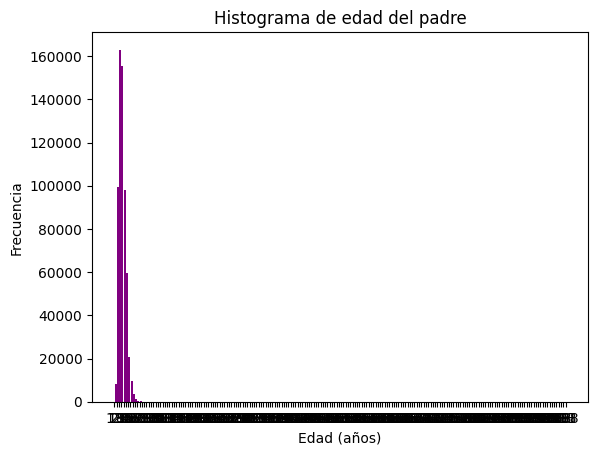

In [7]:
intervalos = range(min(df.EDAD_PADRE), max(df.EDAD_PADRE) + 1, 5)
plt.hist(df.EDAD_PADRE, bins=intervalos, color="purple", rwidth=0.85)
plt.title("Histograma de edad del padre")
plt.xlabel("Edad (años)")
plt.ylabel("Frecuencia")
plt.xticks(intervalos)
plt.show()


En este bloque se construye el histograma de la variable *EDAD_PADRE*:

* Se crean los intervalos del histograma usando *range()*, desde el valor mínimo hasta el valor máximo de las edades, en pasos de 5 años.

* Se grafica el histograma usando *plt.hist()*, estableciendo el color morado ("purple") y ajustando el ancho de las barras *(rwidth=0.85)*.

* Se agregan el título del gráfico, las etiquetas de los ejes (edad y frecuencia) y se configuran las marcas del eje *x* (xticks) para que coincidan con los intervalos.

* Finalmente, *plt.show()* muestra el gráfico.

Este histograma permite visualizar cómo se distribuyen las edades de los padres de recién nacidos en Colombia.

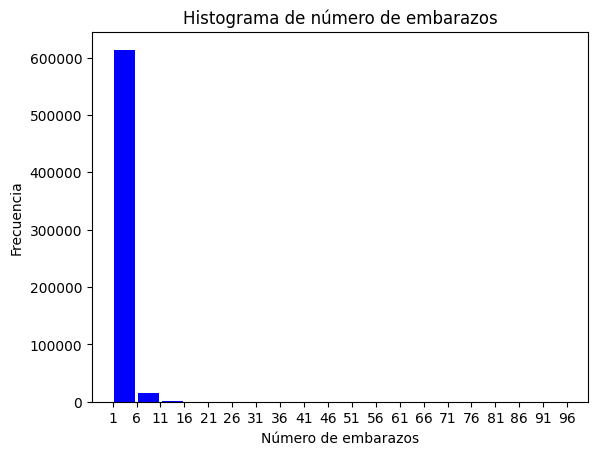

In [8]:
intervalos = range(min(df.N_EMB), max(df.N_EMB) + 1, 5)
plt.hist(df.N_EMB, bins=intervalos, color="blue", rwidth=0.85)
plt.title("Histograma de número de embarazos")
plt.xlabel("Número de embarazos")
plt.ylabel("Frecuencia")
plt.xticks(intervalos)
plt.show()


En este bloque se construye el histograma de la variable *N_EMB* (número de embarazos):

* Se crean los intervalos usando *range()*, desde el valor mínimo hasta el valor máximo de embarazos, en pasos de 5 unidades.

* Se grafica el histograma usando *plt.hist()*, eligiendo el color azul ("blue") y ajustando el ancho de las barras (rwidth=0.85).

* Se agregan el título del gráfico y las etiquetas correctas para los ejes: número de embarazos en el *eje X* y frecuencia en el *eje Y*.

* *plt.show()* muestra el gráfico.

Este histograma permite visualizar la distribución de la cantidad de embarazos registrados en el dataset.

In [9]:
df1 = df[(df.EDAD_PADRE < 120) & (df.N_EMB < 99)]
df1.head(5)


,EDAD_PADRE,N_EMB
COD_DPTO,,
44,20,1
44,20,1
44,20,1
44,20,1
44,20,1


En este bloque se realiza una limpieza de datos atípicos:

* Se crea un nuevo *DataFrame* llamado **df1** que filtra los datos para excluir valores extremos en las variables:

  * *EDAD_PADRE < 120*: se descartan registros donde el padre tenga una edad igual o superior a 120 años.

  * *N_EMB < 99*: se descartan registros con 99 o más embarazos.

* Esta limpieza se hace para evitar que estos valores atípicos distorsionen los análisis estadísticos y gráficos posteriores.

* Finalmente, se visualizan las primeras cinco filas del nuevo conjunto de datos limpio *(df1.head(5))*.

<ipython-input-10-4bc2cab72390>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, label='Distribuición Normal', color = "darkblue")


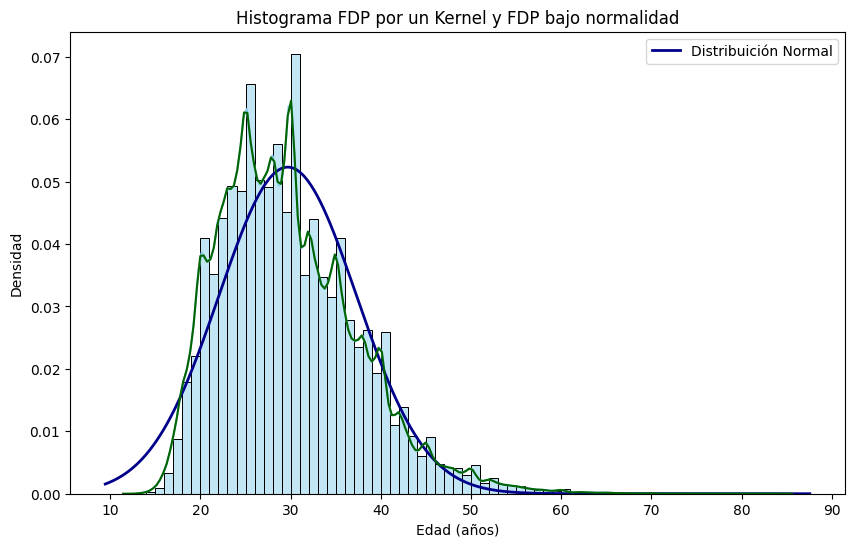

In [10]:
intervalos1 = range(min(df1.EDAD_PADRE), max(df1.EDAD_PADRE) + 1)
plt.figure(figsize=(10, 6))
sns.histplot(x = df1.EDAD_PADRE, bins = intervalos1, kde = True, stat = "density", color = "skyblue", edgecolor= "black")#kde=true es la grafica de la función de densidad de probabilidad estimada por el metodo kernell

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, np.mean(df1.EDAD_PADRE), np.std(df1.EDAD_PADRE)) #pdf=función de densidad de probapilidad de la distribución normal, mean=media, std=desviación  estandar

plt.plot(x, p, 'k', linewidth=2, label='Distribuición Normal', color = "darkblue")
sns.kdeplot(x=df1.EDAD_PADRE, color ="darkgreen")

plt.title("Histograma FDP por un Kernel y FDP bajo normalidad")
plt.xlabel("Edad (años)")
plt.ylabel("Densidad")
plt.legend()

plt.show()

En este bloque se genera un histograma de la variable *EDAD_PADRE* utilizando el conjunto de datos limpio *(df1)*. Además, se agregan dos funciones de densidad para comparar:

* El histograma se genera con sns.*histplot()*, donde:

  * *kde=True* activa la curva de densidad estimada mediante el método Kernel Density Estimation (KDE).

  * *stat="density"* normaliza el eje Y para mostrar densidad en lugar de frecuencia absoluta.

* Se define un rango de valores x entre el mínimo y el máximo del *eje X*, y se calcula la función de densidad teórica de una distribución normal usando la media y desviación estándar de los datos *(norm.pdf())*.

* Se grafican:

  * La curva azul oscuro que representa la distribución normal teórica.

  * La curva verde que representa la densidad real estimada con KDE.

Esto permite comparar visualmente si la variable *EDAD_PADRE* se comporta como una distribución normal o si hay desviaciones significativas.

Sea $X:=$ Edad del padre de un recien nacido en Colombia.
Descriptivamente como la funcion de densidad de probabilidad de los datos estimada por  un metodo kernel (linea verde) no coincide con la cuncion de densidad de probabilidad asumiendo el supuesto de normalidad (linea azul). $X\sim \text{normal}  (\text{Media} = \bar{x}, \text{Varianza} = S^2_x)$, entonces no asumimos normalidad.

<ipython-input-11-99b7c54da407>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, label='Distribuición Normal', color = "Purple")


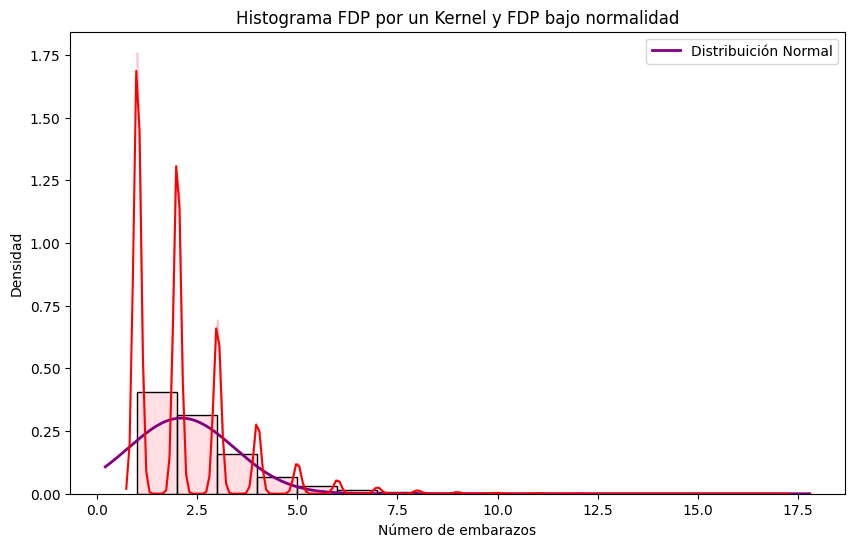

In [11]:
intervalos1 = range(min(df1.N_EMB), max(df1.N_EMB) + 1)
plt.figure(figsize=(10, 6))
sns.histplot(x = df1.N_EMB, bins = intervalos1, kde = True, stat = "density", color = "pink", edgecolor= "black")#kde=true es la grafica de la función de densidad de probabilidad estimada por el metodo kernell

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = norm.pdf(x, np.mean(df1.N_EMB), np.std(df1.N_EMB)) #pdf=función de densidad de probapilidad de la distribución normal, mean=media, std=desviación  estandar

plt.plot(x, p, 'k', linewidth=2, label='Distribuición Normal', color = "Purple")
sns.kdeplot(x=df1.N_EMB, color ="red")

plt.title("Histograma FDP por un Kernel y FDP bajo normalidad")
plt.xlabel("Número de embarazos")
plt.ylabel("Densidad")
plt.legend()

plt.show()

En este bloque se construye el histograma de la variable *N_EMB* (número de embarazos) usando el conjunto de datos limpio *(df1)*. Se superponen dos curvas:

*  La curva KDE (roja), que estima la densidad de probabilidad real con el método Kernel.

* La curva teórica normal (morada), calculada con la media y desviación estándar de los datos reales *(norm.pdf())*.

Esto permite observar si la distribución de *N_EMB* se asemeja a una distribución normal o no.

Además:

* El histograma se normaliza *(stat="density")* para que la suma del área sea 1.

Las etiquetas y leyendas ayudan a interpretar los resultados correctamente.

sea $X':=$ Número de embarazos en Colombia.
Descriptivamente como la funcion de densidad de probabilidad de los datos estimada por  un metodo kernel (linea roja) no coincide con la cuncion de densidad de probabilidad asumiendo el supuesto de normalidad (linea morada). $X\sim \text{normal}  (\text{Media} = \bar{x}, \text{Varianza} = S^2_x)$, entonces no asumimos normalidad.

In [12]:
shapiro(df1.EDAD_PADRE) #prueba de Shapiro Wilk, para probar que definitivamente no se tiene normalidad

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 620089.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=np.float64(0.9585366961101476), pvalue=np.float64(1.0550548621328776e-120))

En este bloque se aplica la **prueba de normalidad de Shapiro-Wilk** a la variable *EDAD_PADRE* utilizando la función *shapiro()* de la librería *scipy.stats*.

Esta prueba evalúa si los datos provienen de una distribución normal:

* Devuelve dos valores: el estadístico de la prueba y el valor p.

* Si el valor p es menor a 0.05, se rechaza la hipótesis nula, lo que indica que los datos no siguen una distribución normal.

* Si el valor p es mayor a 0.05, no se rechaza la hipótesis nula, por lo tanto, los datos podrían seguir una distribución normal.

Este resultado debe analizarse junto con el histograma y la curva de densidad estimada.



En nuestor caso particular, tenemos que pvalue=0.0 < 0.05, es decir, se rechaza que la variables aleatoria de la edad de un padre de un recien nacido en Colombia presenta distribuición normal



In [13]:
df1.EDAD_PADRE.count()
len(df1.EDAD_PADRE)

620089

En este bloque se calcula la cantidad de datos disponibles en la variable *EDAD_PADRE* después de aplicar la limpieza:

* *df1.EDAD_PADRE.count()*: cuenta el número de datos no nulos (no vacíos) en la columna *EDAD_PADRE*.

* *len(df1.EDAD_PADRE)*: mide la longitud total de la columna, es decir, el número total de filas.

Conocer la cantidad de datos es importante para interpretar la validez de los resultados estadísticos posteriores."

In [18]:
idx = np.random.randint(len(df1.EDAD_PADRE), size = 100)
shapiro(df1.EDAD_PADRE.iloc[idx])


ShapiroResult(statistic=np.float64(0.9399585900537012), pvalue=np.float64(0.00019167421672431855))

En este bloque se aplica la prueba de normalidad de **Shapiro-Wilk** a una muestra aleatoria de 100 datos de la variable /EDAD_PADRE/:

* *np.random.randint(len(df1.EDAD_PADRE), size=100)* genera 100 posiciones aleatorias dentro del tamaño de la columna.

* *df1.EDAD_PADRE.iloc[idx]* selecciona los valores de edad correspondientes a esas posiciones aleatorias.

* Luego, *shapiro()* evalúa si esta muestra aleatoria sigue una distribución normal.

Esta técnica se utiliza cuando el conjunto de datos es grande, ya que Shapiro-Wilk puede ser más preciso o ejecutarse más rápido en muestras pequeñas.

Como el valor p (igual a $1.000675320383948 ×10^{-9} $) es menor que 0.05, entonces rechaza que la variable aleatoria de la edad de un padre de un recien nacido en Colombia presenta distribuición normal.

In [ ]:
shapiro(df1.N_EMB)

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 620089.



ShapiroResult(statistic=np.float64(0.7727150151798861), pvalue=np.float64(7.969573267819491e-175))

Se aplica la prueba de normalidad de **Shapiro-Wilk** a la variable *N_EMB*, que representa el número de embarazos (incluyendo el actual):

* Esta prueba determina si los datos siguen una distribución normal.

* Devuelve dos valores:

  * El estadístico de prueba, que mide qué tan cerca están los datos de una distribución normal.

  * El valor p, que indica si se debe rechazar o no la hipótesis nula.

Interpretación:

* Si *p < 0.05*, se rechaza la hipótesis nula: los datos no siguen una distribución normal.

* Si *p ≥ 0.05*, no se rechaza la hipótesis nula: los datos podrían seguir una distribución normal.

In [ ]:
df1.N_EMB.count()
len(df1.N_EMB)

620089

En este bloque se calcula el número total de observaciones de la variable *N_EMB* después de la limpieza:

 * *df1.N_EMB.count()*: cuenta el número de valores no nulos (no vacíos) en la columna N_EMB.

*  *len(df1.N_EMB)*: mide la longitud total de la columna, es decir, el número total de registros.

En este caso, ambos métodos deberían devolver el mismo resultado, ya que después de la limpieza no se dejaron valores nulos.

Saber cuántos datos hay es importante para validar el tamaño de la muestra y la confiabilidad de los análisis estadísticos posteriores.

In [21]:
idx = np.random.randint(len(df1.N_EMB), size = 100)
shapiro(df1.N_EMB.iloc[idx])

ShapiroResult(statistic=np.float64(0.7562110706656648), pvalue=np.float64(1.3707728517395293e-11))

En este bloque se aplica la prueba de normalidad de **Shapiro-Wilk** a una muestra aleatoria de 100 datos de la variable *N_EMB*:

* *np.random.randint(len(df1.N_EMB), size=100)* genera 100 posiciones aleatorias dentro del tamaño de la columna.

* *df1.N_EMB.iloc[idx]* selecciona los valores de edad correspondientes a esas posiciones aleatorias.

* Luego, *shapiro()* evalúa si esta muestra aleatoria sigue una distribución normal.

En este caso, tenemos que pvalue=  7.96 × 10⁻¹⁷⁵< 0.05 rechazas la hipótesis de normalidad y el número de embarazos en Colombia no se comporta como una distribución normal.

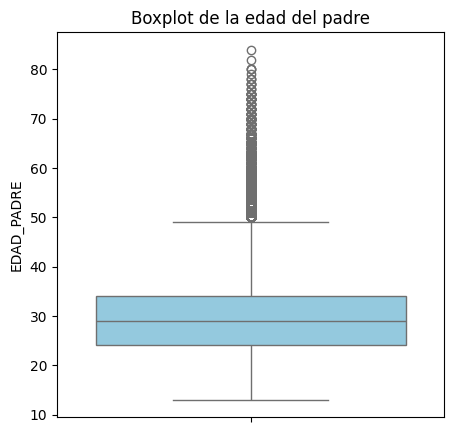

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(df1.EDAD_PADRE, color ="skyblue", saturation=0.75)
plt.title("Boxplot de la edad del padre")
plt.show()

Se considera que la edad de un padre de un recien nacido en Colombia es atípica si es mayor que 50 años. El primer cuartil es aproximadamente 25 años, la media aritmética es aproximadamente 29 años y el tercer cuartil es aproximadamente 35 años.

$\text{Rango intercuartílico = Tercer cuartil - Primer cuartil} =35 - 25 =10$

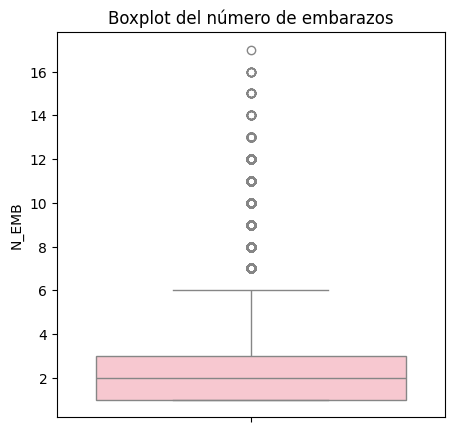

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(df1.N_EMB, color ="pink", saturation=0.75)
plt.title("Boxplot del número de embarazos")
plt.show()

El análisis del número de embarazos en Colombia muestra que los valores superiores a 6 pueden ser considerados atípicos. El primer cuartil es igual a 1, la media aritmética es 2, y el tercer cuartil es 3.

$\text{Rango intercuartílico = Tercer cuartil - Primer cuartil} =3 - 1 =2$

In [ ]:
print(f"Media : {np.mean(df1.EDAD_PADRE)}")
print(f"Varianza : {np.var(df1.EDAD_PADRE)}y la desviación estándar es de {np.std(df1.EDAD_PADRE)}")
print(f"Asimetría : {skew(df1.EDAD_PADRE)}")
print(f"Curtosis : {kurtosis(df1.EDAD_PADRE)}")

Media : 29.677262990134402
Varianza : 58.13770767232451y la desviación estándar es de 7.624808697424776
Asimetría : 0.8353028835229743
Curtosis : 0.9739261066839422




*   Aproximadamente el promedio de la edad de un padre de un recien nacido en Colombia es de 29.7 años
*   Aproximadamente la dstancia entre los valores de la edad un padre de un recien nacido enColombia y la media es de 7.62 años
*   La distribución de la edad de un padre de un recien nacido en Colombia es asimétrica positiva, es decir, la media es mayor que la moda de la variable aleatoria
*   La distribución es platicúrtica, es decir, hay una baja concentración de las edades de un padre de un recien nacido en Colombia con respecto a al media



In [ ]:
print(f"Media : {np.mean(df1.N_EMB)}")
print(f"Varianza : {np.var(df1.N_EMB)}y la desviación estándar es de {np.std(df1.N_EMB)}")
print(f"Asimetría : {skew(df1.N_EMB)}")
print(f"Curtosis : {kurtosis(df1.N_EMB)}")

Media : 2.1018111916192677
Varianza : 1.7487690570926004y la desviación estándar es de 1.3224103210019953
Asimetría : 1.9224080210250476
Curtosis : 6.016780393777454


*   En promedio, las mujeres en Colombia tienen alrededor de 2 embarazos.
*   La varianza indica la dispersión de los datos. Como no es muy alta comparada con la media, los datos no están tan dispersos, aunque hay cierta variabilidad (de 1.75).
*   El número de embarazos está fuertemente sesgado hacia la derecha (hay más mujeres con pocos embarazos, pero algunas pocas tienen muchos embarazos, y eso estira la distribución hacia la derecha)., es decir, la media es mayor que la moda de la variable aleatoria
*   La distribución es leptocúrtica, es decir, s decir, más concentrada alrededor de la media pero con colas más pesadas, evidenciando la presencia de valores extremos.



<function matplotlib.pyplot.show(close=None, block=None)>

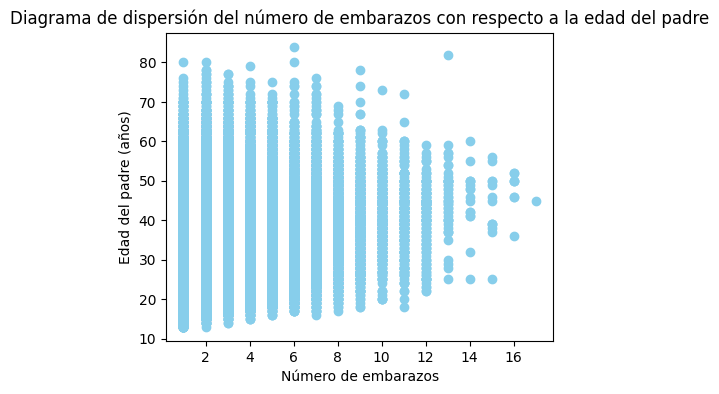

In [ ]:
plt.figure(figsize=(5,4))
plt. scatter(df1.N_EMB, df1.EDAD_PADRE, color = "skyblue", marker ="o")
plt.title("Diagrama de dispersión del número de embarazos con respecto a la edad del padre")
plt.xlabel("Número de embarazos")
plt.ylabel("Edad del padre (años)")
plt.show


El número de embarazos y la edad de un padre en Colombia no están correlacionadas.

In [ ]:
modelo = LinearRegression()
modelo.fit(np.array(df1.N_EMB).reshape(-1, 1), np.array(df1.EDAD_PADRE).reshape(-1, 1))
predi_lineal = modelo.predict(np.array(df1.N_EMB).reshape(-1, 1))
predi_lineal

array([[27.43534225],
       [27.43534225],
       [27.43534225],
       ...,
       [29.47056813],
       [27.43534225],
       [27.43534225]])

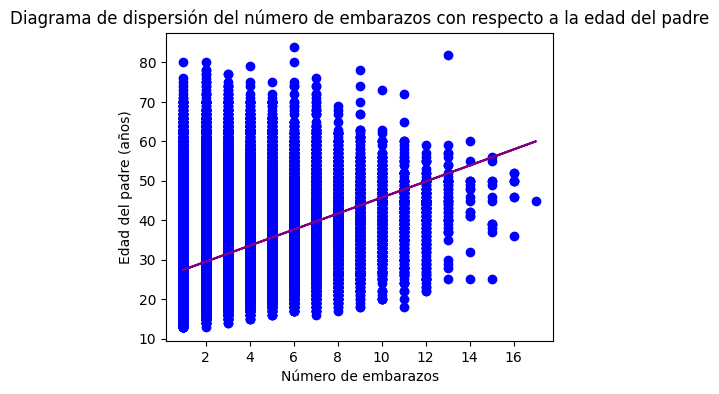

In [ ]:
plt.figure(figsize=(5,4))
plt. scatter(df1.N_EMB, df1.EDAD_PADRE, color = "blue", marker ="o")
plt.plot(df1.N_EMB, predi_lineal, linestyle="-", color = "purple")
plt.title("Diagrama de dispersión del número de embarazos con respecto a la edad del padre")
plt.xlabel("Número de embarazos")
plt.ylabel("Edad del padre (años)")
plt.show()


De acuerdo con la recta de regresión se determina una correlación positiva, es decir que  los hombres con mayor edad tienden a tener parejas con más embarazos

In [ ]:
coef_person = np.corrcoef(df1.N_EMB, df1.EDAD_PADRE)[0, 1]
coef_spearman, _ =spearmanr(df1.N_EMB, df1.EDAD_PADRE)
coef_kendall, _ = kendalltau(df1.N_EMB, df1.EDAD_PADRE)
print(f"Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {coef_person}, {coef_spearman} y {coef_kendall}.")

Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.3529583266676772, 0.37985917047049816 y 0.29686774207661487.


Para la iterpretación de los coeficientes de correlación nos ayudaremos de la referencia:

Landis, J. R., & Koch, G. G. (1977). The measurement of observer agreement for categorical data. biometrics, 159-174. [Link](https://www.jstor.org/stable/2529310)

*   X y Y son independientes o no estaán correlacionadas: $\rho (X, Y) \approx 0, \eta (X,Y) \approx 0, \kappa (X,Y) \approx 0$
*   Y depende insignificantemente de X o X y Y están insignificantemente correlacionadas si  $0 < \vert \rho (X, Y) \vert < 0.2$, $0 < \eta (X, Y) \vert < 0.2$, $0 < \vert \kappa (X, Y) \vert < 0.2$
*  Y depende discretamente de X o X y Y están discretamente correlacionadas si  $0.2 < \vert \rho (X, Y) \vert < 0.4$, $0.2 < \eta (X, Y) \vert < 0.4$, $0.2 < \vert \kappa (X, Y) \vert < 0.4$
*  Y depende moderadamente de X o X y Y están moderadamente correlacionadas si  $0.4 < \vert \rho (X, Y) \vert < 0.6$, $0.4 < \eta (X, Y) \vert < 0.6$, $0.4 < \vert \kappa (X, Y) \vert < 0.6$
*  Y depende sustancialmente de X o X y Y están sustancialmente correlacionadas si  $0.6 < \vert \rho (X, Y) \vert < 0.8$, $0.6 < \eta (X, Y) \vert < 0.8$, $0.6 < \vert \kappa (X, Y) \vert < 0.8$
*  Y depende fuertemente de X o X y Y están fuertemente correlacionadas si  $0.8 < \vert \rho (X, Y) \vert < 1$, $0.8 < \eta (X, Y) \vert < 1$, $0.8 < \vert \kappa (X, Y) \vert < 1$

De acuerdo con los coeficientes de correlación de Pearson, de Kendall y de Spearman se determinan que el número de embarazos y la edad de un padre de un recién nacido en Colombia están discretamente correlacionadas.

# **1. ¿Cómo se comporta la edad del padre (EDAD_PADRE)?**

En el histograma de edad del padre se muestra lo que es una distribución unimodal con valores concentrado en las edades de veinte a treinta años mostrando una cola hacia la derecha que indica asimetría positiva. Esto los podemos confirmar numéricamente así:
*   	La media es aproximadamente 29.7 años.
*   	La desviación es de 7.62 años.
*   	El coeficiente de asimetría es +0.835.
*   	La curtosis es aproximadamente +0.97.

La asimetría positiva indica que hay más valores extremos por encima de la media que por debajo de esta. Por su parte, la curtosis positiva significa colas “más pesadas” y más valores atípicos extremos que en una distribución normal. La edad del padre se comporta con un perfil asimétrico positivo y leptocúrtico, con tendencia a presentar casos de edad mayores como valores atípicos.

Los estadísticos descriptivos claves de *(EDAD_PADRE)* son: media y desviación típica. Debido al sesgo positivo la media supera a la mediana. La dispersión es moderada $(varianza ≈ 58.14)$. En términos de forma, la distribución es platicúrtica relativa a la normalidad de Pearson pues tiene colas más pesadas, lo cual sugiere una menor concentración de datos en torno a la media y presencia de valores extremos. Estos concuerda con la forma observada en el histograma y muestra una no normalidad para *(EDAD_PADRE)*.

# **2. ¿Cómo se comporta el número de embarazos (N_EMB)?**


En el histograma de *(N_EMB)* se muestra que la mayor parte de las observaciones están en valores bajos, 1 ó 2 embarazos, y la frecuencia decrece rápidamente para valores mayores, con una cola muy alargada hacia la derecha. Los resultados descriptivos muestran un fuerte sesgo positivo y gran concentración de valores bajos:
*   La media es ≈ 2.10 embarazos.
*  La desviación típica ≈ 1.32.
* 	Varianza ≈ 1.75.
* 	El coeficiente de asimetría es ≈ +1.92, lo cual indica una gran cola derecha.

La curtosis fue ≈ 6,02, lo cual indica una distribución altamente leptocúrtica con colas más “pesadas” y múltiples valores extremos. En otras palabras, a pesar de la baja dispersión central, hay varias observaciones con número muy elevado de embarazos (valores extremos) que extienden la cola derecha. La prueba de normalidad Shapiro-Wilk para *(N_EMB)* arrojó $W≈0.7727$ con $p-valor ~7.97×10⁻¹⁷⁵ (≪0.05)$, rechazando drásticamente la normalidad. Esto coincide con la notable asimetría y curtosis observadas. Esto es, dado que para una distribución normal el estadístico de curtosis es 0, obtener 6 indica muchos más valores atípicos extremos de lo normal.

En conclusión, el número de embarazos presenta una distribución altamente sesgada a la derecha y leptocúrtica. Su $media (~2.1)$ supera claramente la $mediana (1)$, propio de la asimetría positiva. La mayoría de los casos tienen pocos embarazos, pero existen algunos casos con embarazos muy altos que distorsionan la forma. La forma de la distribución (cola larga) y los coeficientes de asimetría y curtosis evidencian claramente desviaciones de la normalidad, lo que se corrobora al rechazar Shapiro-Wilk la hipótesis de normalidad $(p≪0.05)$.


#**3. ¿Están correlacionadas estas dos variables? ¿Qué tan fuerte es la correlación?**

En el diagrama de dispersión de *(N_EMB)* versus *(EDAD_PADRE)* se revela una ligera tendencia creciente: en general, padres de mayor edad tienden a asociarse a un número algo mayor de embarazos. Esta tendencia moderada se cuantifica con los coeficientes de correlación obtenidos: **Pearson $\rho ≈ 0.353$**, **Spearman $\eta ≈ 0.380$** y **Kendall $\kappa ≈ 0.297$**. Todos son positivos, indicando relación creciente. Según la interpretación estándar, un valor de Pearson entre $0$ y $1$ indica correlación positiva (relación directa). Es claro que $0.353$ se sitúa en ese intervalo, señalando una correlación positiva moderada. De manera análoga, Spearman y Kendall, que son medidas no paramétricas basadas en rangos, también son positivas $(\eta ≈ 0.38)$ y $(\kappa ≈ 0.30)$.

En conclusión, El análisis estadístico muestra que la edad del padre de un recien nacido en Colombia tiene *media $≈29.7$* años con distribución asimétrica positiva y no normal, y que el número de embarazos incluyendo el año actual tiene *media $≈2.1$* con fuerte asimetría positiva y curtosis elevada. Ambos análisis univariados coinciden en rechazar la normalidad *(Shapiro-Wilk, $p≪0.05$)* debido a su sesgo y colas anchas. El gráfico conjunto y los coeficientes de correlación indican que estas variables están correlacionadas positivamente en grado moderado *(Pearson $\rho ≈ 0.353$*, *Spearman $\eta ≈ 0.380$* y *Kendall $\kappa ≈ 0.297$)*, lo que significa que padres de más edad tienden a asociarse a más embarazos, aunque la relación no es muy fuerte. Todos estos resultados se apoyan en los gráficos y cálculos descriptivos realizados, dando un panorama completo del comportamiento estadístico de ambas variables en el conjunto de datos.

**Conclusión**

En resumen, el análisis de las variables *EDAD_PADRE* y *N_EMB* revela que ambas presentan distribuciones sesgadas a la derecha, con asimetría positiva y presencia de valores atípicos extremos. La edad del padre tiene una distribución unimodal con una media de aproximadamente 29.7 años y una dispersión moderada, mientras que el número de embarazos muestra una distribución altamente sesgada y leptocúrtica, con una media de alrededor de 2.1 embarazos. Ambos análisis rechazan la normalidad, confirmando que las distribuciones no siguen una forma típica.

La correlación entre estas dos variables, aunque moderada, es positiva. Es decir, a medida que aumenta la edad del padre, también tiende a aumentar el número de embarazos, aunque esta relación no es muy fuerte. Los coeficientes de correlación (Pearson ≈ 0.353, Spearman ≈ 0.380, Kendall ≈ 0.297) respaldan esta conclusión de manera consistente.

Para el contexto colombiano, estos resultados sugieren que los padres de mayor edad tienden a tener más embarazos, aunque la relación no es determinante. Este hallazgo podría estar vinculado a factores socioeconómicos, culturales o demográficos específicos del país, como la transición de las edades reproductivas, los patrones de matrimonio o los cambios en la planificación familiar. Es relevante que, a pesar de la moderada correlación, la gran dispersión de los datos indica que otras variables podrían influir en la cantidad de embarazos, como el acceso a servicios de salud, la educación y las decisiones personales.
